In [39]:
import pandas as pd
import json


In [12]:
DATA_FOLDER = './Data/'

CHARACTER_PATH = DATA_FOLDER + 'MovieSummaries/character.metadata.tsv'
MOVIE_PATH = DATA_FOLDER + 'MovieSummaries/movie.metadata.tsv'
ETHNICITY_PATH = DATA_FOLDER + 'ethnicities_data.tsv'

## Loading of the characters data

In [30]:
characters = pd.read_csv(CHARACTER_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie release date", "Character name", "Birth", 
    "Gender", "Height", "Ethnicity ID", "Name", "Age at movie release",
    "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"])
characters.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [5]:
ethnicities_data = pd.read_csv(ETHNICITY_PATH, sep='\t', 
                               header=None, names=["Ethnicity ID", "Ethnicity"])
ethnicities_data.head()

,Ethnicity ID,Ethnicity
0,/m/0x67,African Americans
1,/m/064b9n,Omaha people
2,/m/041rx,Jewish people
3,/m/033tf_,Irish Americans
4,/m/04gfy7,Indian Americans


Then we can merge the ethicity data with the characters dataset

In [6]:
characters = characters.merge(ethnicities_data, how='inner', on='Ethnicity ID')
characters.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Ethnicity
0,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans
1,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,African Americans
2,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp,African Americans
3,156558,/m/014k4y,2001-06-27,Yvette,1970-09-11,F,1.650,/m/0x67,Taraji P. Henson,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,African Americans
4,156558,/m/014k4y,2001-06-27,Jody,1978-12-30,M,1.797,/m/0x67,Tyrese Gibson,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,African Americans


Let's visualized the proportion of ethinicties

<Axes: xlabel='Ethnicity'>

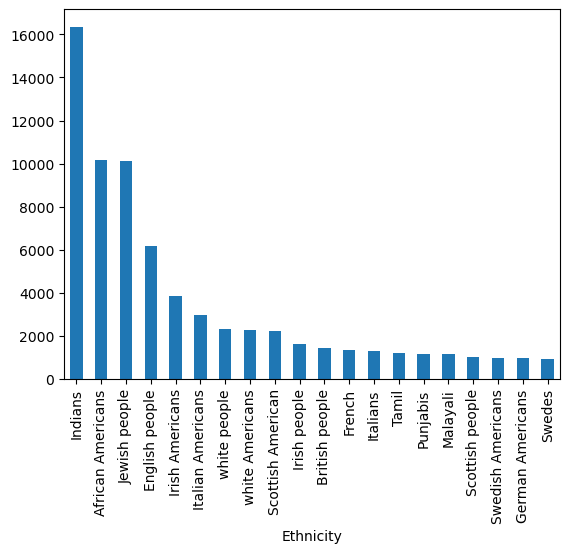

In [7]:
grouped_ethinity = characters.groupby(['Ethnicity']).count()
#grouped_ethinity = grouped_ethinity.div(grouped_ethinity.sum(axis=1), axis=0)
main_ethnicities = grouped_ethinity['Freebase actor ID'].sort_values(ascending=False)[0:20]
main_ethnicities.plot(kind='bar')


We can see a lot of indian person. For our project we mostly want to focus only on Holywoodian actors.
Let's isolate hollywoodian actors

## Load the movie dataset

In [21]:
movies = pd.read_csv(MOVIE_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie rame","Movie release date", "Box office revenue","Movie runtime","Movie language","Movie countries","Movie genres" ])
movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie rame,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


Merge the character and the movie dataset

In [31]:
characters_movies = characters.merge(movies, how='inner', on=['Wikipedia Movie ID',"Freebase Movie ID","Movie release date"])
characters_movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie rame,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


Take only the holywoodian/american actors, which means the actors which have played on an american movie.

In [51]:
char = characters_movies["Movie countries"][0]
char

'{"/m/09c7w0": "United States of America"}'

In [40]:
characters_movies["Movie countries"].apply(lambda x: (list(json.loads(x).values())))

0         [United States of America]
1         [United States of America]
2         [United States of America]
3         [United States of America]
4         [United States of America]
                     ...            
450664                       [Japan]
450665                       [Japan]
450666              [United Kingdom]
450667              [United Kingdom]
450668              [United Kingdom]
Name: Movie countries, Length: 450669, dtype: object

In [ ]:
american_actors = characters_movies[characters_movies['Movies countries']]